<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/NLP_text_analytics_assignment_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string,spacy

In [112]:
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline


In [113]:
tweets = pd.read_csv('/content/Elon_musk.csv',encoding='latin-1')

In [114]:
tweets

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [115]:
tweets.drop('Unnamed: 0',axis=1,inplace=True)

In [116]:
tweets

Text
0                                @kunalb11 Im an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

In [117]:
tweets = [Text.strip() for Text in tweets['Text']]

In [118]:
tweets = [Text for Text in tweets if Text] #removes empty strings

In [119]:
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [120]:
tweets_text = ' '.join(tweets)

In [121]:
tweets_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [122]:
from nltk.tokenize import TweetTokenizer

In [123]:
tknr = TweetTokenizer(strip_handles=True)
tweets_tokens = tknr.tokenize(tweets_text)
print(tweets_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [124]:
tweets_token_text = ' '.join(tweets_tokens)

In [125]:
tweets_token_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [126]:
no_punc_text = tweets_token_text.translate(str.maketrans('','',string.punctuation))

In [127]:
no_punc_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [128]:
import re

In [129]:
no_url = re.sub(r'http\S+','',no_punc_text)

In [130]:
no_url

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [131]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [132]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_url)
print(text_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing',

In [133]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [134]:
len(tweets_token_text)

119173

In [135]:
len(tweets_tokens)

20832

In [136]:
len(tweets_text)

158702

In [137]:
len(text_tokens)

17847

In [138]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
sw_list = ['\x92','rt','ye','yeah','Yes','I','U0001F923']
stopwords.extend(sw_list)
no_stop_tokens = [word for word in text_tokens if not word in stopwords]
print(no_stop_tokens)
len(no_stop_tokens)

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'haha', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one', 'mission', 'Once', 'predict', 'cas

11489

In [139]:
lower_case = [Text.lower() for Text in no_stop_tokens]
lower_case[100:200]

['mission',
 'once',
 'predict',
 'cash',
 'flow',
 'reasonably',
 'well',
 'starlink',
 'ipo',
 'starlink',
 'staggeringly',
 'difficult',
 'technical',
 'economic',
 'endeavor',
 'however',
 'spacex',
 'needs',
 'pass',
 'deep',
 'chasm',
 'negative',
 'cash',
 'flow',
 'next',
 'year',
 'lowest',
 'cost',
 'per',
 'ton',
 'carbon',
 'sequestered',
 'net',
 'value',
 'product',
 'made',
 'must',
 'scalable',
 'g',
 'it',
 'meant',
 'price',
 'countries',
 'only',
 'difference',
 'taxes',
 'shipping',
 'this',
 'intended',
 'earth',
 'may',
 'ideas',
 'apply',
 'mars',
 'xprize',
 'team',
 'manage',
 '100m',
 'carbon',
 'capture',
 'prize',
 'everyone',
 'tesla',
 'receives',
 'stock',
 'my',
 'comp',
 'stock',
 'options',
 'take',
 'table',
 'that',
 'missing',
 'back',
 'work',
 'go',
 'does',
 'seem',
 'bit',
 'high',
 'doge',
 'appears',
 'inflationary',
 'meaningfully',
 'fixed',
 'coins',
 'per',
 'unit',
 'time',
 'whereas',
 'wow',
 '1',
 'orbital',
 'launch',
 'tower',
 'stac

In [140]:
from nltk.stem import PorterStemmer

In [141]:
ps = PorterStemmer()
stemmed = [ps.stem(word) for word in lower_case]

In [142]:
stemmed

['alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tri',
 'great',
 'interview',
 'doge',
 'underestim',
 'congratul',
 'tesla',
 'china',
 'amaz',
 'execut',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happi',
 'new',
 'year',
 'ox',
 'frodo',
 'underdog',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'haha',
 'thank',
 'inde',
 'tweet',
 'definit',
 'repres',
 'realworld',
 'time',
 'alloc',
 'the',
 'entertain',
 'outcom',
 'like',
 'just',
 'sent',
 'just',
 'agre',
 'clubhous',
 'it',
 'get',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'he',
 'definit',
 'issu',
 'sentenc',
 'seem',
 'bit',
 'high',
 'thank',
 'fix',
 'pleas',
 'unlock',
 'account',
 'thi',
 'true',
 'power',
 'haha',
 'ani',
 'crypto',
 'wallet',
 'give',
 'privat',
 'key',
 'avoid',
 'cost',
 'your',
 'app',
 'suck',
 'rt',
 'nasa',
 'select',
 'falcon',
 'heavi',
 'launch',
 'first',
 'two',
 'element',
 'lunar',
 'gateway',
 'togeth',
 'one',
 'mission

In [143]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(lower_case))
doc


alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse it getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account this true power haha any crypto wallet give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g it meant price countries only difference taxes shipping this intended e

In [144]:
lemmas = [token.lemma_ for token in doc]
lemmas

['alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'try',
 'great',
 'interview',
 'doge',
 'underestimate',
 'congratulation',
 'tesla',
 'china',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happy',
 'new',
 'year',
 'ox',
 'frodo',
 'underdoge',
 'all',
 'think',
 'would',
 'fail',
 'himself',
 'haha',
 'thank',
 'indeed',
 'tweet',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'the',
 'entertaining',
 'outcome',
 'likely',
 'just',
 'send',
 'just',
 'agree',
 'clubhouse',
 'it',
 'get',
 'real',
 'buy',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'he',
 'definitely',
 'issue',
 'sentencing',
 'seem',
 'bit',
 'high',
 'thank',
 'fix',
 'please',
 'unlock',
 'account',
 'this',
 'true',
 'power',
 'haha',
 'any',
 'crypto',
 'wallet',
 'give',
 'private',
 'key',
 'avoid',
 'cost',
 'your',
 'app',
 'suck',
 'rt',
 'nasa',
 'select',
 'falcon',
 'heavy',
 'launch',
 'first',
 'two',
 'element',
 'lunar',

In [145]:
clean_tweets = ' '.join(lemmas)

In [146]:
clean_tweets

'alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all think would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power haha any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g it mean price country only difference taxis ship this intend earth may idea apply mars xprize team manage 1

In [147]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
tweets_nlp = cv.fit_transform(lemmas)

In [148]:
print(cv.vocabulary_)

{'alien': 195, 'ray': 2359, 'trace': 3023, 'cyberpunk': 769, 'hdr': 1364, 'nextlevel': 1969, 'have': 1359, 'try': 3055, 'great': 1312, 'interview': 1561, 'doge': 894, 'underestimate': 3188, 'congratulation': 677, 'tesla': 2931, 'china': 587, 'amazing': 219, 'execution': 1063, 'last': 1645, 'year': 3405, 'now': 1997, 'next': 1968, 'even': 1037, 'happy': 1346, 'new': 1966, 'ox': 2098, 'frodo': 1213, 'underdoge': 3187, 'all': 198, 'think': 2959, 'would': 3391, 'fail': 1098, 'himself': 1406, 'haha': 1335, 'thank': 2941, 'indeed': 1502, 'tweet': 3070, 'definitely': 807, 'represent': 2426, 'realworld': 2374, 'time': 2982, 'allocation': 200, 'the': 2945, 'entertaining': 1007, 'outcome': 2076, 'likely': 1699, 'just': 1603, 'send': 2569, 'agree': 179, 'clubhouse': 616, 'it': 1580, 'get': 1272, 'real': 2369, 'buy': 505, 'dogecoin': 896, 'lil': 1700, 'toddler': 2993, 'hodler': 1412, 'he': 1365, 'issue': 1579, 'sentencing': 2574, 'seem': 2561, 'bit': 420, 'high': 1398, 'fix': 1158, 'please': 2193,

In [149]:
cv.get_feature_names_out()[100:200]

array(['74', '78', '7th', '90', '9007', '922', '948', '95', '99', 'aber',
       'able', 'abo', 'aboard', 'abort', 'about', 'above', 'absence',
       'absolute', 'absolutely', 'absorb', 'absorption', 'absurd',
       'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate',
       'acceleration', 'accelerator', 'accept', 'acceptable', 'access',
       'accessible', 'accident', 'accidental', 'accommodate', 'account',
       'accura', 'accuracy', 'accurate', 'ace', 'achieve', 'achievement',
       'achy', 'acquisition', 'across', 'action', 'active', 'activity',
       'actual', 'actuall', 'actually', 'actuary', 'adagio', 'add',
       'additive', 'address', 'administer', 'adult', 'advanc', 'advance',
       'advanced', 'advantage', 'adventure', 'advertise', 'advice',
       'advise', 'aero', 'afb', 'affair', 'affect', 'affordable',
       'africa', 'after', 'afternoon', 'age', 'ago', 'agony', 'agree',
       'ah', 'ahead', 'ahem', 'ai', 'aim', 'aiming', 'air', 'aircraft',
       

In [150]:
tweets_nlp.toarray()[100:200]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [151]:
tweets_nlp.toarray().shape

(11514, 3425)

In [152]:
cv_ngram_range = CountVectorizer(analyzer='word', ngram_range=(1,3),max_features=100)
bow_matrix_ngram = cv_ngram_range.fit_transform(lemmas)

In [153]:
cv_ngram_range.get_feature_names_out()

array(['actually', 'also', 'back', 'big', 'booster', 'car', 'come',
       'complete', 'cool', 'could', 'crew', 'day', 'design', 'do',
       'dragon', 'earth', 'engine', 'even', 'ever', 'exactly', 'falcon',
       'first', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great',
       'haha', 'hard', 'high', 'if', 'it', 'land', 'launch', 'life',
       'like', 'look', 'lot', 'make', 'many', 'mar', 'maybe', 'mission',
       'model', 'month', 'much', 'need', 'new', 'next', 'no', 'not', 'ok',
       'one', 'part', 'people', 'point', 'pretty', 'probably',
       'production', 'right', 'rocket', 'rt', 'say', 'seem', 'soon',
       'space', 'spacex', 'starlink', 'starship', 'start', 'still',
       'super', 'sure', 'take', 'tesla', 'test', 'thank', 'that', 'the',
       'there', 'they', 'think', 'this', 'time', 'true', 'try', 'ufe0f',
       'use', 'way', 'we', 'week', 'well', 'will', 'work', 'would',
       'yeah', 'year', 'you'], dtype=object)

In [154]:
bow_matrix_ngram.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [156]:
tfidf = TfidfVectorizer(norm='l2',analyzer='word', ngram_range=(1,3),max_features=500)
matrix = tfidf.fit_transform(lemmas)

In [157]:
tfidf.get_feature_names_out()

array(['10', '100', '13', '20', '2020', '30', '300', '40', '4d', '60',
       'able', 'absolutely', 'access', 'accurate', 'actually', 'add',
       'after', 'ago', 'agree', 'ai', 'aim', 'air', 'all', 'almost',
       'already', 'also', 'although', 'always', 'amazing', 'and',
       'another', 'appear', 'apply', 'appreciate', 'approval', 'arm',
       'around', 'article', 'as', 'astronaut', 'at', 'autopilot',
       'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become',
       'berlin', 'beta', 'big', 'bit', 'boca', 'body', 'booster', 'brain',
       'bring', 'bs', 'build', 'burn', 'but', 'buy', 'cake', 'call',
       'camera', 'can', 'car', 'cargo', 'catch', 'cell', 'ch4', 'chance',
       'change', 'civilization', 'close', 'cold', 'color', 'come',
       'company', 'complete', 'computer', 'confirm', 'congratulation',
       'control', 'cool', 'cost', 'could', 'course', 'cov', 'crazy',
       'create', 'crew', 'critical', 'curevac', 'cyberpunk', 'cybertruck',
       'datum

In [158]:
matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

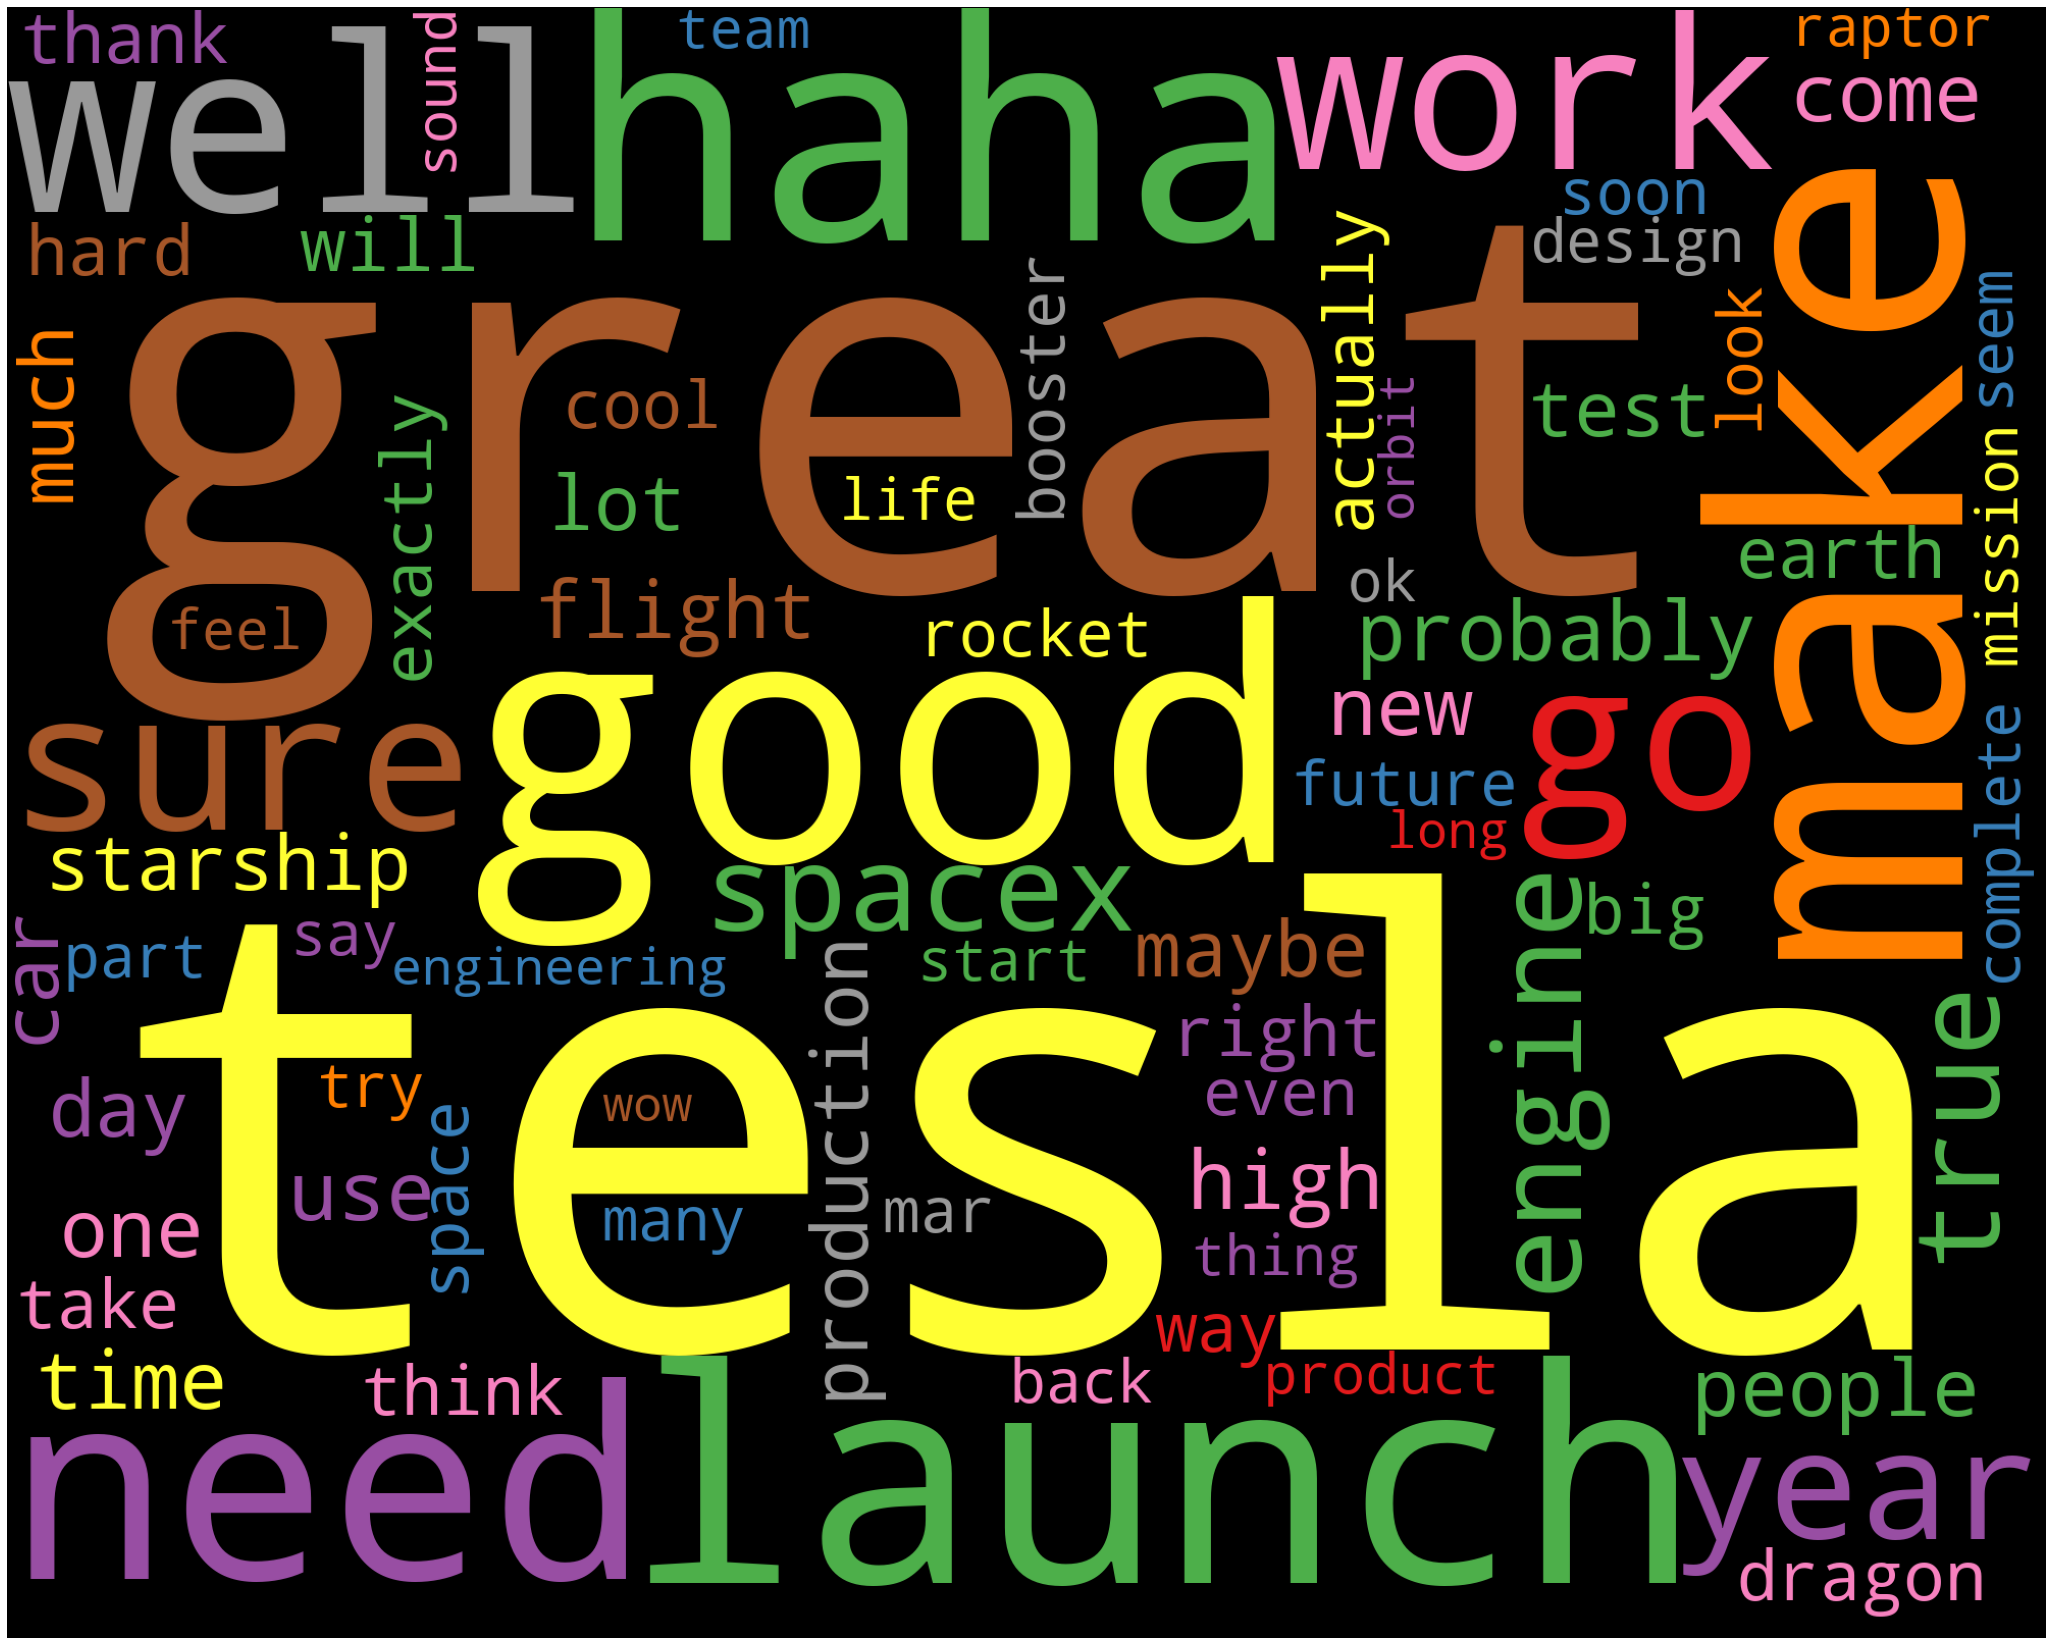

In [159]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(40,30))
  plt.imshow(wordcloud)
  plt.axis('off')

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud = WordCloud(width=2000, height= 1600,max_words = 75, colormap='Set1',background_color='black', stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

In [160]:
nlp = spacy.load('en_core_web_sm')
one_block = clean_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,jupyter=True,style='ent')

In [161]:
for token in doc_block[100:200]:
  print(token, token.pos_)

mission NOUN
once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink VERB
ipo NOUN
starlink NOUN
staggeringly ADV
difficult ADJ
technical ADJ
economic ADJ
endeavor NOUN
however ADV
spacex ADJ
need AUX
pass VERB
deep ADJ
chasm NOUN
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
g NOUN
it PRON
mean VERB
price NOUN
country NOUN
only ADV
difference NOUN
taxis ADJ
ship NOUN
this PRON
intend VERB
earth NOUN
may AUX
idea NOUN
apply VERB
mars PROPN
xprize PROPN
team NOUN
manage VERB
100 NUM
m PROPN
carbon NOUN
capture NOUN
prize PROPN
everyone PRON
tesla NOUN
receive VERB
stock NOUN
my PRON
comp NOUN
stock NOUN
option NOUN
take VERB
table NOUN
that PRON
miss VERB
back ADP
work NOUN
go VERB
do AUX
seem VERB
bit ADV
high ADJ
doge X
appear VERB
inflationary ADJ
meaningfully ADV
fix VERB
coin NOUN
per ADP
unit NOUN
time NOUN
whereas SCONJ
wow NUM
1 

In [162]:
noun_verb = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(noun_verb[100:200])

['orbit', 'booster', 'improve', 'ship', 'booster', 'mass', 'work', 'tonight', 'ðogecoin', 'video', 'people', 'speak', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'u0001f3b6', 'let', 'come', 'crypto', 'simplicity', 'genius', 'decade', 'work', 'look', 'note', 'email', 'text', 'lesson', 'learn', 'earth', 'time', 'tell', 'story', 'tesla', 'read', 'kingdom', 'hear', 'name', 'year', 'dogecake', 'thing', 'restaurant', 'hang', 'currency', 'earth', 'scratch', 'destiny', 'franz', 'say', 'ship', 'landing', 'burn', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'seem', 'raptor', 'launch', 'mission', 'collect', 'galaxy', 'explore', 'launch', 'starlink', 'satellite', 'orbit', 'mission', 'pad', '39a', 'deck', 'default', 'engine', 'lever', 'arm', 'shut', 'engine', 'point', 'flameout', 'risk', 'start', 'engine', 'shut', 'need', 'land', 'become', 'destroyer', 'happen', 'sandstorm', 'masterpiece', 'dumb', 'time', 'try']


In [163]:
cv_model = CountVectorizer()

In [164]:
X = cv_model.fit_transform(noun_verb)

In [165]:
sum = X.sum(axis=0)
word_frq = [(word,sum[0,idx]) for word,idx in cv_model.vocabulary_.items()]
word_frq = sorted(word_frq, key=lambda x:x[1], reverse=True)
wd_fr = pd.DataFrame(word_frq, columns=['word','count'])

In [166]:
wd_fr

word  count
0         launch     64
1           make     64
2           year     49
3           work     48
4             go     47
...          ...    ...
1926        dire      1
1927    priority      1
1928  propaganda      1
1929       click      1
1930      dumber      1

[1931 rows x 2 columns]

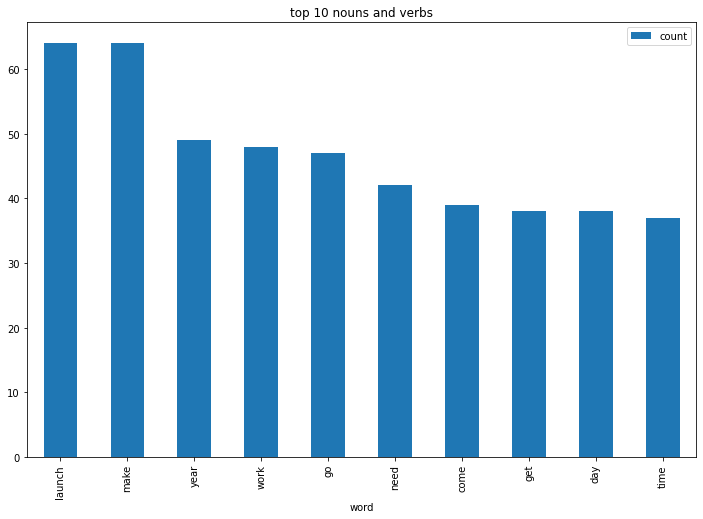

In [167]:
wd_fr[0:10].plot.bar(x='word', figsize=(12,8),title='top 10 nouns and verbs')

In [168]:
tweets

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [169]:
from nltk import tokenize

In [170]:
sentences = tokenize.sent_tokenize(' '.join(tweets))

In [171]:
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [172]:
sent1_df = pd.DataFrame(sentences, columns=['sentence'])

In [173]:
sent1_df

sentence
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
..                                                 ...
919  @kenyanwalstreet Not actually a payout, just a...
920  It may never pay out, as the stock cant b
 ht...
921                                    Details Aug 28.
922  AI symbiosis while u wait @vistacruiser7 @flcn...
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...

[924 rows x 1 columns]

In [174]:
!pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.3 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=c4c9591d0f38c9df95d47768d4b1de09a126fe8ac4d3160c9fcd2fbdc27e2241
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [175]:
from afinn import Afinn

In [176]:
afn = Afinn()

In [177]:
afn

In [178]:
afinn = pd.read_csv('/content/Afinn.csv', sep=',', encoding='latin-1')

In [179]:
afinn

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [180]:
affin_scores = afinn.set_index('word')['value'].to_dict()

In [181]:
affin_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [182]:
nlp = spacy.load('en_core_web_sm')
def cal_sentiment(text:string=None):
  senti_score = 0
  if text:
    sentence = nlp(text)
    for word in sentence:
      senti_score+=affin_scores.get(word.lemma_,0)
  return senti_score
  

In [183]:
cal_sentiment(text='great')

3

In [186]:
sent1_df['senti_value'] = sent1_df['sentence'].apply(cal_sentiment)

In [187]:
sent1_df['word_count'] = sent1_df['sentence'].str.split().apply(len)

In [188]:
sent1_df.describe()

senti_value  word_count
count    924.00000  924.000000
mean       1.37013   22.844156
std        2.67799   24.133961
min       -8.00000    1.000000
25%        0.00000    7.000000
50%        0.00000   14.000000
75%        3.00000   31.000000
max       16.00000  231.000000

In [189]:
negative = sent1_df[sent1_df['senti_value']<0]

In [190]:
positive = sent1_df[sent1_df['senti_value']>0]

In [191]:
positive

sentence  senti_value  \
2                  @joerogan @Spotify Great interview!            3   
3    @gtera27 Doge is underestimated @teslacn Congr...            3   
7    https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...            2   
9    The most entertaining outcome is the most like...            3   
17   Back to work I go @CapybaraSurfer @MattWallace...            4   
..                                                 ...          ...   
911                       He was one of the very best.            3   
913  @Ali_Afshari In general, we need to improve ho...            4   
915  @burakaydik True Wow, IHOP &amp; GitHub are cl...            3   
917               This is both great &amp; terrifying.            3   
918  Everything weve ever sensed or thought has be...            3   

     word_count  
2             4  
3            13  
7            10  
9           109  
17           38  
..          ...  
911           7  
913          87  
915          15  
917           6  
918          17  

[436 rows x 3 columns]

In [192]:
sent1_df

sentence  senti_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...            0   
1                                   Have you tried it?            0   
2                  @joerogan @Spotify Great interview!            3   
3    @gtera27 Doge is underestimated @teslacn Congr...            3   
4                   Now on to the next for even more!!            0   
..                                                 ...          ...   
919  @kenyanwalstreet Not actually a payout, just a...            0   
920  It may never pay out, as the stock cant b
 ht...           -4   
921                                    Details Aug 28.            0   
922  AI symbiosis while u wait @vistacruiser7 @flcn...           -2   
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...            0   

     word_count  
0            13  
1             4  
2             4  
3            13  
4             8  
..          ...  
919          11  
920          31  
921           3  
922          47  
923          15  

[924 rows x 3 columns]

In [193]:
sent1_df['sentiment'] = sent1_df['senti_value'].apply(lambda c: 'Positive' if c>0 else ('Negative' if c<0  else 'Neutral'))

In [194]:
sent1_df

sentence  senti_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...            0   
1                                   Have you tried it?            0   
2                  @joerogan @Spotify Great interview!            3   
3    @gtera27 Doge is underestimated @teslacn Congr...            3   
4                   Now on to the next for even more!!            0   
..                                                 ...          ...   
919  @kenyanwalstreet Not actually a payout, just a...            0   
920  It may never pay out, as the stock cant b
 ht...           -4   
921                                    Details Aug 28.            0   
922  AI symbiosis while u wait @vistacruiser7 @flcn...           -2   
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...            0   

     word_count sentiment  
0            13   Neutral  
1             4   Neutral  
2             4  Positive  
3            13  Positive  
4             8   Neutral  
..          ...       ...  
919          11   Neutral  
920          31  Negative  
921           3   Neutral  
922          47  Negative  
923          15   Neutral  

[924 rows x 4 columns]

In [195]:
sent1_df[sent1_df['senti_value']==0]

sentence  senti_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...            0   
1                                   Have you tried it?            0   
4                   Now on to the next for even more!!            0   
5                            Happy New Year of the Ox!            0   
8    Tweets definitely do not represent real-world ...            0   
..                                                 ...          ...   
914  That is a revolution in automotive body engine...            0   
916                   @PPathole @IheartTesla For sure.            0   
919  @kenyanwalstreet Not actually a payout, just a...            0   
921                                    Details Aug 28.            0   
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...            0   

     word_count sentiment  
0            13   Neutral  
1             4   Neutral  
4             8   Neutral  
5             6   Neutral  
8             8   Neutral  
..          ...       ...  
914           9   Neutral  
916           4   Neutral  
919          11   Neutral  
921           3   Neutral  
923          15   Neutral  

[382 rows x 4 columns]

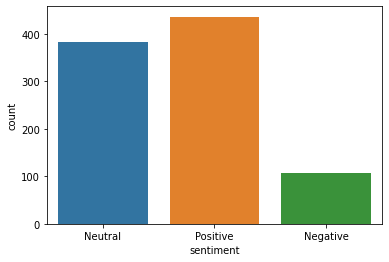

In [201]:
sns.countplot(x='sentiment',data=sent1_df)

In [203]:
sent1_df.groupby('sentiment').count()

sentence  senti_value  word_count
sentiment                                   
Negative        106          106         106
Neutral         382          382         382
Positive        436          436         436

In [197]:
import seaborn as sns

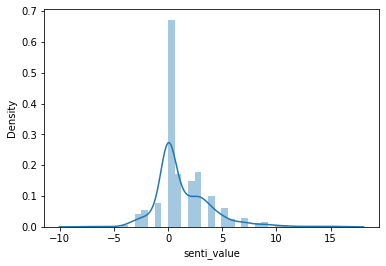

In [196]:
sns.distplot(sent1_df['senti_value'])

In [198]:
sent1_df.skew()

senti_value    1.479335
word_count     2.374239
dtype: float64

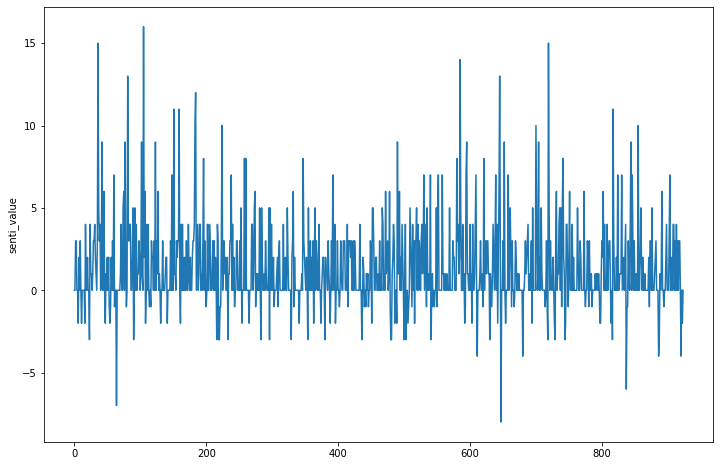

In [199]:

plt.figure(figsize=(12,8))
sns.lineplot(x=sent1_df.index, y='senti_value',data=sent1_df)

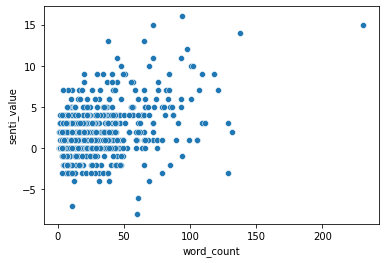

In [200]:
sns.scatterplot(x='word_count',y='senti_value',data=sent1_df)

In [204]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Pie(labels=type_, values=sent1_df['sentiment'].value_counts(), name="sentiment"))
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

There are more positive tweets compared  to negative and neutral

**Emotion mining of the reviews of Amazon products.**
Assignment part 2
---



In [2]:
import pandas as pd
import numpy as np
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [3]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [4]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [5]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [8]:
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


  0%|          | 0/999 [00:00<?, ?it/s]

In [9]:
df = pd.DataFrame(reviewlist)

In [10]:
df

Rating                                              Title  \
0        5.0                             Excellent all rounder!   
1        1.0                                  bakwas mobile hai   
2        3.0                                   Phone hang issue   
3        5.0                                            amazing   
4        4.0  A decent package for non gamers and everything...   
...      ...                                                ...   
2415     5.0                                        KYU BATAU😂😒   
2416     5.0                                             Nice 👍   
2417     1.0                         Downfall begins of oneplus   
2418     4.0                                      Honest review   
2419     5.0                                      Awesome Phone   

                                                 Review       Review_Date  
0     The media could not be loaded.\n              ...  27 February 2022  
1                                     bakwas mobile hai  26 February 2022  
2     The media could not be loaded.\n              ...      6 March 2022  
3     Very amazingly built & decently featured smart...  25 February 2022  
4     The media could not be loaded.\n              ...  26 February 2022  
...                                                 ...               ...  
2415                                                  🤣       2 July 2022  
2416                                                         29 June 2022  
2417  Being a oneplus fan for nearly 6 years i am ve...        4 May 2022  
2418  best looking phone ever for the price .The qua...     14 March 2022  
2419  I was looking for a phone below 25k and there ...      26 June 2022  

[2420 rows x 4 columns]

In [11]:
df.to_csv('out.csv')

In [12]:
reviews = pd.read_csv('out.csv')

In [13]:
reviews

Unnamed: 0  Rating                                              Title  \
0              0     5.0                             Excellent all rounder!   
1              1     1.0                                  bakwas mobile hai   
2              2     3.0                                   Phone hang issue   
3              3     5.0                                            amazing   
4              4     4.0  A decent package for non gamers and everything...   
...          ...     ...                                                ...   
2415        2415     5.0                                        KYU BATAU😂😒   
2416        2416     5.0                                             Nice 👍   
2417        2417     1.0                         Downfall begins of oneplus   
2418        2418     4.0                                      Honest review   
2419        2419     5.0                                      Awesome Phone   

                                                 Review       Review_Date  
0     The media could not be loaded.\n              ...  27 February 2022  
1                                     bakwas mobile hai  26 February 2022  
2     The media could not be loaded.\n              ...      6 March 2022  
3     Very amazingly built & decently featured smart...  25 February 2022  
4     The media could not be loaded.\n              ...  26 February 2022  
...                                                 ...               ...  
2415                                                  🤣       2 July 2022  
2416                                                NaN      29 June 2022  
2417  Being a oneplus fan for nearly 6 years i am ve...        4 May 2022  
2418  best looking phone ever for the price .The qua...     14 March 2022  
2419  I was looking for a phone below 25k and there ...      26 June 2022  

[2420 rows x 5 columns]

In [14]:
review = reviews.copy()

In [15]:
review

Unnamed: 0  Rating                                              Title  \
0              0     5.0                             Excellent all rounder!   
1              1     1.0                                  bakwas mobile hai   
2              2     3.0                                   Phone hang issue   
3              3     5.0                                            amazing   
4              4     4.0  A decent package for non gamers and everything...   
...          ...     ...                                                ...   
2415        2415     5.0                                        KYU BATAU😂😒   
2416        2416     5.0                                             Nice 👍   
2417        2417     1.0                         Downfall begins of oneplus   
2418        2418     4.0                                      Honest review   
2419        2419     5.0                                      Awesome Phone   

                                                 Review       Review_Date  
0     The media could not be loaded.\n              ...  27 February 2022  
1                                     bakwas mobile hai  26 February 2022  
2     The media could not be loaded.\n              ...      6 March 2022  
3     Very amazingly built & decently featured smart...  25 February 2022  
4     The media could not be loaded.\n              ...  26 February 2022  
...                                                 ...               ...  
2415                                                  🤣       2 July 2022  
2416                                                NaN      29 June 2022  
2417  Being a oneplus fan for nearly 6 years i am ve...        4 May 2022  
2418  best looking phone ever for the price .The qua...     14 March 2022  
2419  I was looking for a phone below 25k and there ...      26 June 2022  

[2420 rows x 5 columns]

In [16]:
df = reviews.drop(['Unnamed: 0','Review_Date','Title'],axis=1)

In [17]:
df

Rating                                             Review
0        5.0  The media could not be loaded.\n              ...
1        1.0                                  bakwas mobile hai
2        3.0  The media could not be loaded.\n              ...
3        5.0  Very amazingly built & decently featured smart...
4        4.0  The media could not be loaded.\n              ...
...      ...                                                ...
2415     5.0                                                  🤣
2416     5.0                                                NaN
2417     1.0  Being a oneplus fan for nearly 6 years i am ve...
2418     4.0  best looking phone ever for the price .The qua...
2419     5.0  I was looking for a phone below 25k and there ...

[2420 rows x 2 columns]

In [18]:
df.dtypes


Rating    float64
Review     object
dtype: object

In [19]:
df = df.rename({'Review':'comment'},axis=1)

In [20]:
df

Rating                                            comment
0        5.0  The media could not be loaded.\n              ...
1        1.0                                  bakwas mobile hai
2        3.0  The media could not be loaded.\n              ...
3        5.0  Very amazingly built & decently featured smart...
4        4.0  The media could not be loaded.\n              ...
...      ...                                                ...
2415     5.0                                                  🤣
2416     5.0                                                NaN
2417     1.0  Being a oneplus fan for nearly 6 years i am ve...
2418     4.0  best looking phone ever for the price .The qua...
2419     5.0  I was looking for a phone below 25k and there ...

[2420 rows x 2 columns]

In [21]:
df = df.dropna()

In [22]:
df

Rating                                            comment
0        5.0  The media could not be loaded.\n              ...
1        1.0                                  bakwas mobile hai
2        3.0  The media could not be loaded.\n              ...
3        5.0  Very amazingly built & decently featured smart...
4        4.0  The media could not be loaded.\n              ...
...      ...                                                ...
2414     5.0                                            Awesome
2415     5.0                                                  🤣
2417     1.0  Being a oneplus fan for nearly 6 years i am ve...
2418     4.0  best looking phone ever for the price .The qua...
2419     5.0  I was looking for a phone below 25k and there ...

[2275 rows x 2 columns]

In [23]:
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [24]:
df =[comment.strip() for comment in df.comment] 

In [25]:
df=[comment for comment in df if comment] 
df[0:10]

["The media could not be loaded.\n                \n\n\n\n\xa0The Grey mirror finish is really cool and the phone is smooth in day to day usage. Charging speed is very fast but i couldn't test 0 to 100. As an estimate it'll take 30-45 mins for a full charge (Will update after testing). Cameras are all good and in par with RM9pro+(I do have it) especially the front cam. Overall it's a very good phone in this price range.",
 'bakwas mobile hai',
 'The media could not be loaded.\n                \n\n\n\n\xa0Phone is good but this phone hang in every 1 hr also phone head sar is very high 1.023 W/Kg',
 'Very amazingly built & decently featured smartphone...Battery last full day with proper usage & charges really fastVery smooth & accurate fingerprint scannerCamera is decent as per price...Loved it',
 "The media could not be loaded.\n                \n\n\n\n\xa0Build quality - Rating 7.5 : One of the light weight phones out there and has to say it's quite comfortable for one hand usage and e

In [26]:
df_text = ' '.join(df)


In [27]:
df_text

'The media could not be loaded.\n                \n\n\n\n\xa0The Grey mirror finish is really cool and the phone is smooth in day to day usage. Charging speed is very fast but i couldn\'t test 0 to 100. As an estimate it\'ll take 30-45 mins for a full charge (Will update after testing). Cameras are all good and in par with RM9pro+(I do have it) especially the front cam. Overall it\'s a very good phone in this price range. bakwas mobile hai The media could not be loaded.\n                \n\n\n\n\xa0Phone is good but this phone hang in every 1 hr also phone head sar is very high 1.023 W/Kg Very amazingly built & decently featured smartphone...Battery last full day with proper usage & charges really fastVery smooth & accurate fingerprint scannerCamera is decent as per price...Loved it The media could not be loaded.\n                \n\n\n\n\xa0Build quality - Rating 7.5 : One of the light weight phones out there and has to say it\'s quite comfortable for one hand usage and even the mater

In [28]:
no_punc_text=df_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'The media could not be loaded\n                \n\n\n\n\xa0The Grey mirror finish is really cool and the phone is smooth in day to day usage Charging speed is very fast but i couldnt test 0 to 100 As an estimate itll take 3045 mins for a full charge Will update after testing Cameras are all good and in par with RM9proI do have it especially the front cam Overall its a very good phone in this price range bakwas mobile hai The media could not be loaded\n                \n\n\n\n\xa0Phone is good but this phone hang in every 1 hr also phone head sar is very high 1023 WKg Very amazingly built  decently featured smartphoneBattery last full day with proper usage  charges really fastVery smooth  accurate fingerprint scannerCamera is decent as per priceLoved it The media could not be loaded\n                \n\n\n\n\xa0Build quality  Rating 75  One of the light weight phones out there and has to say its quite comfortable for one hand usage and even the material used is polycarbonate but gets t

In [29]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])
len(text_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['The', 'media', 'could', 'not', 'be', 'loaded', 'The', 'Grey', 'mirror', 'finish', 'is', 'really', 'cool', 'and', 'the', 'phone', 'is', 'smooth', 'in', 'day', 'to', 'day', 'usage', 'Charging', 'speed', 'is', 'very', 'fast', 'but', 'i', 'couldnt', 'test', '0', 'to', '100', 'As', 'an', 'estimate', 'itll', 'take', '3045', 'mins', 'for', 'a', 'full', 'charge', 'Will', 'update', 'after', 'testing']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


39320

In [30]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['media', 'could', 'loaded', 'Grey', 'mirror', 'finish', 'really', 'cool', 'phone', 'smooth', 'day', 'day', 'usage', 'Charging', 'speed', 'fast', 'couldnt', 'test', '0', '100', 'As', 'estimate', 'itll', 'take', '3045', 'mins', 'full', 'charge', 'Will', 'update', 'testing', 'Cameras', 'good', 'par', 'RM9proI', 'especially', 'front', 'cam', 'Overall', 'good', 'phone', 'price', 'range', 'bakwas', 'mobile', 'hai', 'media', 'could', 'loaded', 'Phone', 'good', 'phone', 'hang', 'every', '1', 'hr', 'also', 'phone', 'head', 'sar', 'high', '1023', 'WKg', 'Very', 'amazingly', 'built', 'decently', 'featured', 'smartphoneBattery', 'last', 'full', 'day', 'proper', 'usage', 'charges', 'really', 'fastVery', 'smooth', 'accurate', 'fingerprint', 'scannerCamera', 'decent', 'per', 'priceLoved', 'media', 'could', 'loaded', 'Build', 'quality', 'Rating', '75', 'One', 'light', 'weight', 'phones', 'say', 'quite', 'comfortable', 'one', 'hand', 'usage', 'even', 'material', 'used', 'polycarbonate', 'gets', 'job',

In [31]:
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['media', 'could', 'loaded', 'grey', 'mirror', 'finish', 'really', 'cool', 'phone', 'smooth', 'day', 'day', 'usage', 'charging', 'speed', 'fast', 'couldnt', 'test', '0', '100', 'as', 'estimate', 'itll', 'take', '3045', 'mins', 'full', 'charge', 'will', 'update', 'testing', 'cameras', 'good', 'par', 'rm9proi', 'especially', 'front', 'cam', 'overall', 'good', 'phone', 'price', 'range', 'bakwas', 'mobile', 'hai', 'media', 'could', 'loaded', 'phone', 'good', 'phone', 'hang', 'every', '1', 'hr', 'also', 'phone', 'head', 'sar', 'high', '1023', 'wkg', 'very', 'amazingly', 'built', 'decently', 'featured', 'smartphonebattery', 'last', 'full', 'day', 'proper', 'usage', 'charges', 'really', 'fastvery', 'smooth', 'accurate', 'fingerprint', 'scannercamera', 'decent', 'per', 'priceloved', 'media', 'could', 'loaded', 'build', 'quality', 'rating', '75', 'one', 'light', 'weight', 'phones', 'say', 'quite', 'comfortable', 'one', 'hand', 'usage', 'even', 'material', 'used', 'polycarbonate', 'gets', 'job',

In [32]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['media', 'could', 'load', 'grey', 'mirror', 'finish', 'realli', 'cool', 'phone', 'smooth', 'day', 'day', 'usag', 'charg', 'speed', 'fast', 'couldnt', 'test', '0', '100', 'as', 'estim', 'itll', 'take', '3045', 'min', 'full', 'charg', 'will', 'updat', 'test', 'camera', 'good', 'par', 'rm9proi', 'especi', 'front', 'cam', 'overal', 'good', 'phone', 'price', 'rang', 'bakwa', 'mobil', 'hai', 'media', 'could', 'load', 'phone', 'good', 'phone', 'hang', 'everi', '1', 'hr', 'also', 'phone', 'head', 'sar', 'high', '1023', 'wkg', 'veri', 'amazingli', 'built', 'decent', 'featur', 'smartphonebatteri', 'last', 'full', 'day', 'proper', 'usag', 'charg', 'realli', 'fastveri', 'smooth', 'accur', 'fingerprint', 'scannercamera', 'decent', 'per', 'pricelov', 'media', 'could', 'load', 'build', 'qualiti', 'rate', '75', 'one', 'light', 'weight', 'phone', 'say', 'quit', 'comfort', 'one', 'hand', 'usag', 'even', 'materi', 'use', 'polycarbon', 'get', 'job', 'done', 'doesnt', 'matter', 'back', 'cover', 'in', 'ter

In [33]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['medium', 'could', 'load', 'grey', 'mirror', 'finish', 'really', 'cool', 'phone', 'smooth', 'day', 'day', 'usage', 'charge', 'speed', 'fast', 'could', 'not', 'test', '0', '100', 'as', 'estimate', 'it', 'll', 'take', '3045', 'min', 'full', 'charge', 'will', 'update', 'testing', 'camera', 'good', 'par', 'rm9proi', 'especially', 'front', 'cam', 'overall', 'good', 'phone', 'price', 'range', 'bakwa', 'mobile', 'hai', 'medium', 'could', 'load', 'phone', 'good', 'phone', 'hang', 'every', '1', 'hr', 'also', 'phone', 'head', 'sar', 'high', '1023', 'wkg', 'very', 'amazingly', 'build', 'decently', 'feature', 'smartphonebattery', 'last', 'full', 'day', 'proper', 'usage', 'charge', 'really', 'fastvery', 'smooth', 'accurate', 'fingerprint', 'scannercamera', 'decent', 'per', 'priceloved', 'medium', 'could', 'load', 'build', 'quality', 'rating', '75', 'one', 'light', 'weight', 'phone', 'say', 'quite', 'comfortable', 'one', 'hand', 'usage', 'even', 'material', 'use', 'polycarbonate', 'get', 'job', 'do

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
df_cv=cv.fit_transform(lemmas)
print(cv.vocabulary_)
print(cv.get_feature_names()[150:300])
print(df_cv.toarray()[150:300])
print(df_cv.toarray().shape)

{'medium': 2353, 'could': 1069, 'load': 2229, 'grey': 1750, 'mirror': 2415, 'finish': 1543, 'really': 3187, 'cool': 1055, 'phone': 2846, 'smooth': 3531, 'day': 1119, 'usage': 3926, 'charge': 887, 'speed': 3602, 'fast': 1479, 'not': 2589, 'test': 3754, '100': 10, 'as': 481, 'estimate': 1370, 'it': 2042, 'll': 2227, 'take': 3732, '3045': 151, 'min': 2389, 'full': 1605, 'will': 4097, 'update': 3913, 'testing': 3755, 'camera': 807, 'good': 1673, 'par': 2779, 'rm9proi': 3319, 'especially': 1369, 'front': 1602, 'cam': 799, 'overall': 2744, 'price': 3000, 'range': 3156, 'bakwa': 590, 'mobile': 2434, 'hai': 1769, 'hang': 1787, 'every': 1379, 'hr': 1889, 'also': 390, 'head': 1818, 'sar': 3362, 'high': 1850, '1023': 19, 'wkg': 4108, 'very': 3986, 'amazingly': 407, 'build': 761, 'decently': 1148, 'feature': 1501, 'smartphonebattery': 3530, 'last': 2169, 'proper': 3065, 'fastvery': 1493, 'accurate': 331, 'fingerprint': 1538, 'scannercamera': 3380, 'decent': 1142, 'per': 2804, 'priceloved': 3005, '

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(26424, 4251)


In [35]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(2,3),max_features=100,stop_words=my_stop_words)
bow_matrix_ngram=cv_ngram_range.fit_transform(df)
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['also good', 'android 11', 'android 12', 'backup good', 'battery back', 'battery backup', 'battery backup good', 'battery charging', 'battery drains', 'battery good', 'battery life', 'battery life good', 'battery performance', 'best mobile', 'best phone', 'bought phone', 'budget phone', 'buy phone', 'call recording', 'camera also', 'camera average', 'camera battery', 'camera good', 'camera quality', 'camera quality good', 'camera quality poor', 'ce 5g', 'charging fast', 'charging good', 'charging speed', 'could better', 'could loaded', 'customer care', 'day day', 'everything good', 'fast charging', 'finger print', 'fingerprint reader', 'front camera', 'full charge', 'good battery', 'good battery backup', 'good battery life', 'good camera', 'good camera quality', 'good mobile', 'good performance', 'good phone', 'good price', 'good product', 'good quality', 'heating issue', 'heating issues', 'heating problem', 'life good', 'light weight', 'little bit', 'low light', 'media could', 'media

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(2,3),max_features=100,stop_words=my_stop_words)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(df)
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['also good', 'android 11', 'android 12', 'backup good', 'battery back', 'battery backup', 'battery backup good', 'battery charging', 'battery drains', 'battery good', 'battery life', 'battery life good', 'battery performance', 'best mobile', 'best phone', 'bought phone', 'budget phone', 'buy phone', 'call recording', 'camera also', 'camera average', 'camera battery', 'camera good', 'camera quality', 'camera quality good', 'camera quality poor', 'ce 5g', 'charging fast', 'charging good', 'charging speed', 'could better', 'could loaded', 'customer care', 'day day', 'everything good', 'fast charging', 'finger print', 'fingerprint reader', 'front camera', 'full charge', 'good battery', 'good battery backup', 'good battery life', 'good camera', 'good camera quality', 'good mobile', 'good performance', 'good phone', 'good price', 'good product', 'good quality', 'heating issue', 'heating issues', 'heating problem', 'life good', 'light weight', 'little bit', 'low light', 'media could', 'media

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


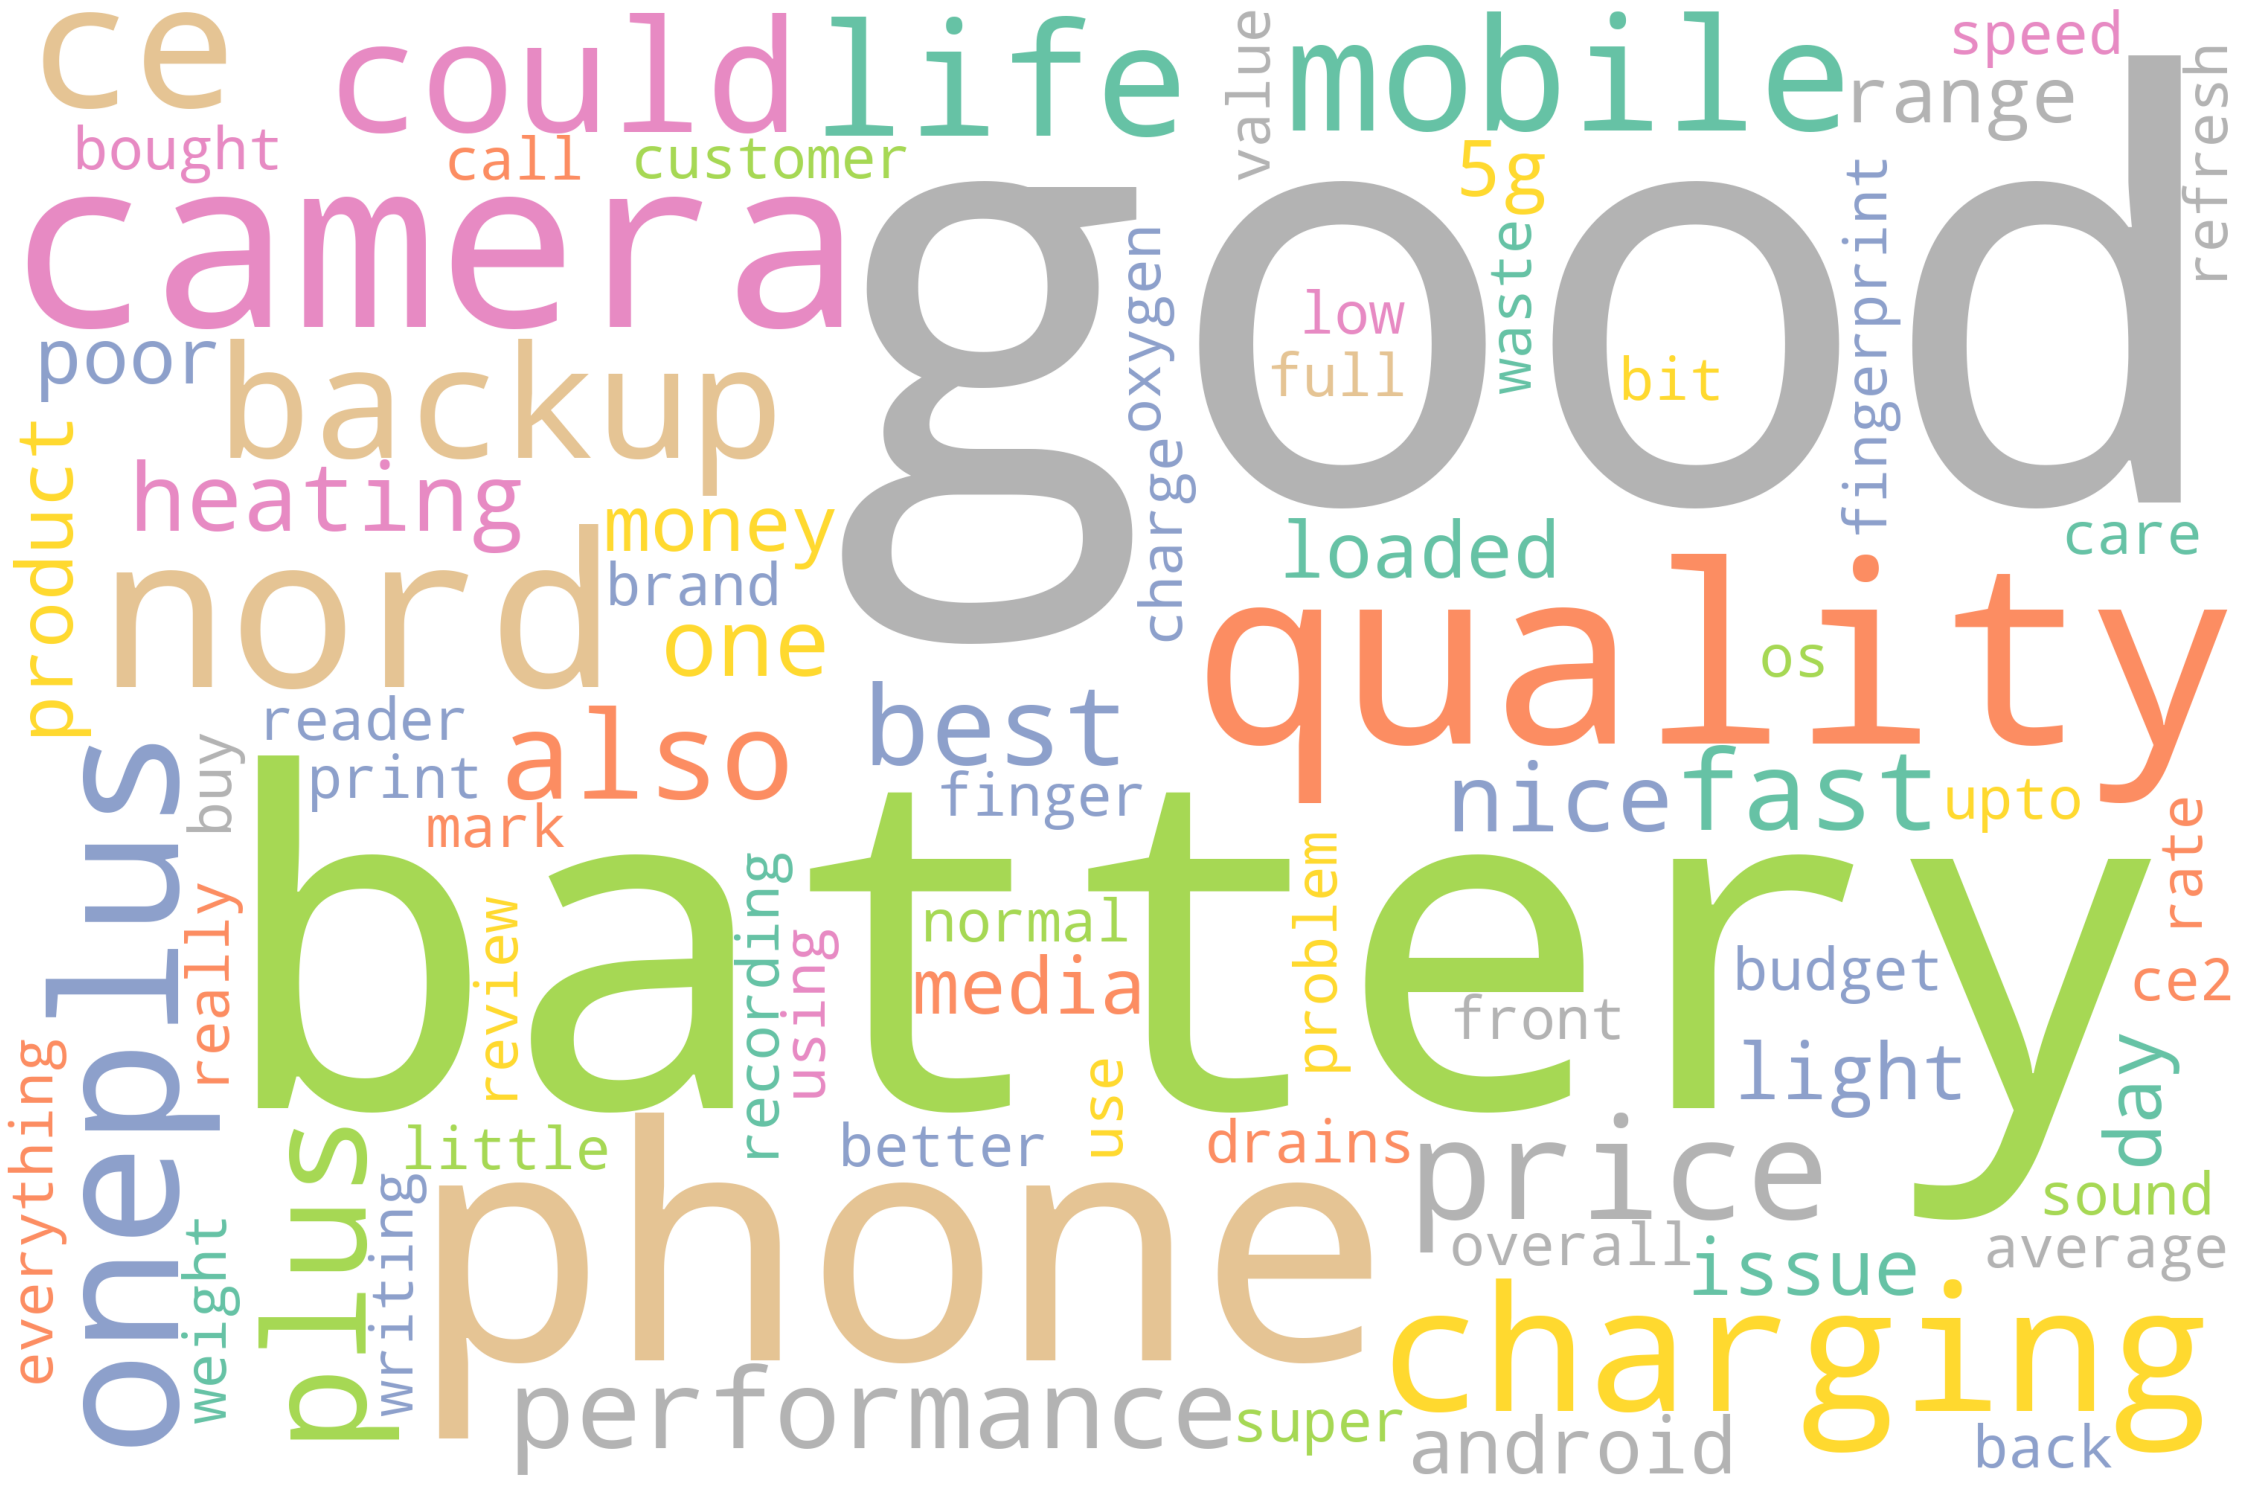

In [38]:
clean_reviews2=' '.join(tfidfv_ngram_max_features.get_feature_names())
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=my_stop_words).generate(clean_reviews2)
plot_cloud(wordcloud)

In [47]:
from posixpath import join
clean_comments = ' '.join(lemmas)

In [48]:
nlp = spacy.load('en_core_web_sm')
one_block = clean_comments
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,jupyter=True,style='ent')

In [49]:
for token in doc_block[80:170]:
  print(token, token.pos_)

accurate ADJ
fingerprint NOUN
scannercamera NOUN
decent ADJ
per ADP
priceloved ADJ
medium NOUN
could AUX
load VERB
build VERB
quality NOUN
rating NOUN
75 NUM
one NUM
light NOUN
weight NOUN
phone NOUN
say VERB
quite ADV
comfortable ADJ
one NUM
hand NOUN
usage NOUN
even ADV
material NOUN
use NOUN
polycarbonate NOUN
get VERB
job NOUN
do AUX
do AUX
not PART
matter VERB
back ADP
cover NOUN
in ADP
term NOUN
style NOUN
similar ADJ
oppo ADJ
phone NOUN
like INTJ
will AUX
not PART
recommend VERB
gray ADJ
one NUM
attache NOUN
fingerprint NOUN
going VERB
use VERB
back ADP
cover NOUN
do AUX
not PART
matterdisplay VERB
rating NOUN
8 NUM
really ADV
good ADV
amoled ADJ
plan NOUN
90hz ADJ
refresh ADJ
rate NOUN
work NOUN
well ADV
wish VERB
could AUX
120hz VERB
but CCONJ
bottom ADJ
chin PROPN
quite ADV
thick ADJ
thing NOUN
yes INTJ
gorilla NOUN
glass NOUN
5 NUM
protection NOUN
screen NOUN
guard NOUN
pre PROPN
apply VERB
but CCONJ
panel NOUN
one NUM
good ADJ
pretty ADV


In [50]:
noun_verb = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(noun_verb[80:170])

['guard', 'apply', 'panel', 'wellperformance', 'rating', 'dimensity', 'lppdr4x', 'ram', 'get', 'job', 'day', 'day', 'operation', 'play', 'game', 'say', 'consider', 'soc', 'expect', 'fps', 'cod', 'say', 'processor', 'competition', 'offer', 'decide', 'gaming', 'matter', 'year', 'normalusagesoftware', 'con', 'android', 'base', 'oxygen', 'os', 'say', 'color', 'oos', 'bug', 'say', 'lot', 'wait', 'android', 'ideacamera', 'rating', 'atleast', 'expect', 'sensor', 'provide', 'omnivison', 'sensor', 'get', 'job', 'camera', 'check', 'review', 'video', 'stability', 'ultratwide', 'camera', 'say', 'offer', 'oneplus', 'manage', 'give', 'thingsbattery', 'rating', 'rate', 'percent', 'mode', 'exclude', 'gaming', 'give', 'hrs', 'sot', 'wifi', 'network', 'jio', 'network', 'rest', 'remain', 'wifi', 'battery', 'task', 'day', 'charge', 'take', 'minute', 'charge', 'percent']


In [52]:
cv_model = CountVectorizer()

In [53]:
X = cv_model.fit_transform(noun_verb)

In [54]:
sum = X.sum(axis=0)
word_frq = [(word,sum[0,idx]) for word,idx in cv_model.vocabulary_.items()]
word_frq = sorted(word_frq, key=lambda x:x[1], reverse=True)
wd_fr = pd.DataFrame(word_frq, columns=['word','count'])

In [55]:
wd_fr

word  count
0                      phone    944
1                     camera    615
2                    battery    468
3                    quality    399
4                        use    246
...                      ...    ...
2400              loud3comes      1
2401                      ip      1
2402                   ratre      1
2403  cheapratingperformance      1
2404                pleasure      1

[2405 rows x 2 columns]

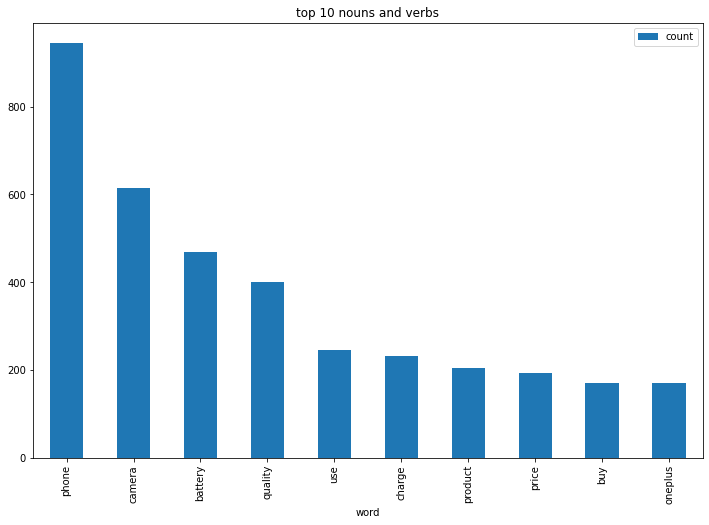

In [56]:
wd_fr[0:10].plot.bar(x='word', figsize=(12,8),title='top 10 nouns and verbs')

In [59]:
df

["The media could not be loaded.\n                \n\n\n\n\xa0The Grey mirror finish is really cool and the phone is smooth in day to day usage. Charging speed is very fast but i couldn't test 0 to 100. As an estimate it'll take 30-45 mins for a full charge (Will update after testing). Cameras are all good and in par with RM9pro+(I do have it) especially the front cam. Overall it's a very good phone in this price range.",
 'bakwas mobile hai',
 'The media could not be loaded.\n                \n\n\n\n\xa0Phone is good but this phone hang in every 1 hr also phone head sar is very high 1.023 W/Kg',
 'Very amazingly built & decently featured smartphone...Battery last full day with proper usage & charges really fastVery smooth & accurate fingerprint scannerCamera is decent as per price...Loved it',
 "The media could not be loaded.\n                \n\n\n\n\xa0Build quality - Rating 7.5 : One of the light weight phones out there and has to say it's quite comfortable for one hand usage and e

In [223]:
from nltk import tokenize

In [224]:
sentences1 = tokenize.sent_tokenize(' '.join(df))

In [225]:
sentences1

['The media could not be loaded.',
 'The Grey mirror finish is really cool and the phone is smooth in day to day usage.',
 "Charging speed is very fast but i couldn't test 0 to 100.",
 "As an estimate it'll take 30-45 mins for a full charge (Will update after testing).",
 'Cameras are all good and in par with RM9pro+(I do have it) especially the front cam.',
 "Overall it's a very good phone in this price range.",
 'bakwas mobile hai The media could not be loaded.',
 'Phone is good but this phone hang in every 1 hr also phone head sar is very high 1.023 W/Kg Very amazingly built & decently featured smartphone...Battery last full day with proper usage & charges really fastVery smooth & accurate fingerprint scannerCamera is decent as per price...Loved it The media could not be loaded.',
 "Build quality - Rating 7.5 : One of the light weight phones out there and has to say it's quite comfortable for one hand usage and even the material used is polycarbonate but gets the job done but doesn'

In [226]:
senti_df = pd.DataFrame(sentences1, columns=['sentence'])

In [227]:
senti_df

sentence
0                        The media could not be loaded.
1     The Grey mirror finish is really cool and the ...
2     Charging speed is very fast but i couldn't tes...
3     As an estimate it'll take 30-45 mins for a ful...
4     Cameras are all good and in par with RM9pro+(I...
...                                                 ...
1975  It's a really VFM phone that runs really smoot...
1976  Yes, the camera could have been slightly bette...
1977  If you haven't used a OnePlus phone before, yo...
1978                     It's still a pleasure to use!!
1979                                                  !

[1980 rows x 1 columns]

In [228]:
afinn = pd.read_csv('/content/Afinn.csv', sep=',',encoding='latin-1')

In [229]:
affin_scores = afinn.set_index('word')['value'].to_dict()

In [230]:
affin_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [231]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [232]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [233]:
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

In [234]:
sentiments_using_SIA = senti_df.sentence.apply(lambda comment: fetch_sentiment_using_SIA(comment))
pd.DataFrame(sentiments_using_SIA.value_counts())

sentence
pos      1589
neg       391

In [235]:
to_check = senti_df.sentence[8]

In [236]:
sia= SentimentIntensityAnalyzer()

In [237]:
sia.polarity_scores(to_check)

{'compound': 0.5082, 'neg': 0.023, 'neu': 0.886, 'pos': 0.091}

In [238]:
data=pd.DataFrame()
data['Review'] = senti_df.sentence
data['scores'] = senti_df['sentence'].apply(lambda review: sia.polarity_scores(review))
data.head()

Review  \
0                     The media could not be loaded.   
1  The Grey mirror finish is really cool and the ...   
2  Charging speed is very fast but i couldn't tes...   
3  As an estimate it'll take 30-45 mins for a ful...   
4  Cameras are all good and in par with RM9pro+(I...   

                                              scores  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
1  {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...  
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
4  {'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp...

In [239]:
data

Review  \
0                        The media could not be loaded.   
1     The Grey mirror finish is really cool and the ...   
2     Charging speed is very fast but i couldn't tes...   
3     As an estimate it'll take 30-45 mins for a ful...   
4     Cameras are all good and in par with RM9pro+(I...   
...                                                 ...   
1975  It's a really VFM phone that runs really smoot...   
1976  Yes, the camera could have been slightly bette...   
1977  If you haven't used a OnePlus phone before, yo...   
1978                     It's still a pleasure to use!!   
1979                                                  !   

                                                 scores  
0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
1     {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...  
2     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
3     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
4     {'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp...  
...                                                 ...  
1975  {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'comp...  
1976  {'neg': 0.0, 'neu': 0.801, 'pos': 0.199, 'comp...  
1977  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
1978  {'neg': 0.0, 'neu': 0.539, 'pos': 0.461, 'comp...  
1979  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  

[1980 rows x 2 columns]

In [240]:
data['compound']  = data['scores'].apply(lambda scores: scores['compound'])
data.head()

Review  \
0                     The media could not be loaded.   
1  The Grey mirror finish is really cool and the ...   
2  Charging speed is very fast but i couldn't tes...   
3  As an estimate it'll take 30-45 mins for a ful...   
4  Cameras are all good and in par with RM9pro+(I...   

                                              scores  compound  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
1  {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...    0.4201  
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
4  {'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp...    0.4404

In [241]:
from pandas.io.formats.info import DataFrameTableBuilder
data['sentiment'] = data['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
data

Review  \
0                        The media could not be loaded.   
1     The Grey mirror finish is really cool and the ...   
2     Charging speed is very fast but i couldn't tes...   
3     As an estimate it'll take 30-45 mins for a ful...   
4     Cameras are all good and in par with RM9pro+(I...   
...                                                 ...   
1975  It's a really VFM phone that runs really smoot...   
1976  Yes, the camera could have been slightly bette...   
1977  If you haven't used a OnePlus phone before, yo...   
1978                     It's still a pleasure to use!!   
1979                                                  !   

                                                 scores  compound sentiment  
0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral  
1     {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...    0.4201  Positive  
2     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral  
3     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral  
4     {'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp...    0.4404  Positive  
...                                                 ...       ...       ...  
1975  {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'comp...    0.8360  Positive  
1976  {'neg': 0.0, 'neu': 0.801, 'pos': 0.199, 'comp...    0.7354  Positive  
1977  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral  
1978  {'neg': 0.0, 'neu': 0.539, 'pos': 0.461, 'comp...    0.6467  Positive  
1979  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral  

[1980 rows x 4 columns]

In [242]:
data_new = data.dropna()

In [243]:
data_new

Review  \
0                        The media could not be loaded.   
1     The Grey mirror finish is really cool and the ...   
2     Charging speed is very fast but i couldn't tes...   
3     As an estimate it'll take 30-45 mins for a ful...   
4     Cameras are all good and in par with RM9pro+(I...   
...                                                 ...   
1975  It's a really VFM phone that runs really smoot...   
1976  Yes, the camera could have been slightly bette...   
1977  If you haven't used a OnePlus phone before, yo...   
1978                     It's still a pleasure to use!!   
1979                                                  !   

                                                 scores  compound sentiment  
0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral  
1     {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...    0.4201  Positive  
2     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral  
3     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral  
4     {'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp...    0.4404  Positive  
...                                                 ...       ...       ...  
1975  {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'comp...    0.8360  Positive  
1976  {'neg': 0.0, 'neu': 0.801, 'pos': 0.199, 'comp...    0.7354  Positive  
1977  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral  
1978  {'neg': 0.0, 'neu': 0.539, 'pos': 0.461, 'comp...    0.6467  Positive  
1979  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral  

[1980 rows x 4 columns]

In [244]:
import seaborn as sns

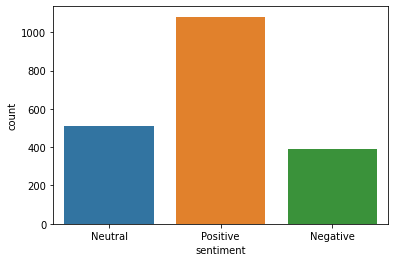

In [245]:
sns.countplot(data['sentiment'])

In [246]:
data.groupby('sentiment').count()

Review  scores  compound
sentiment                          
Negative      388     388       388
Neutral       511     511       511
Positive     1081    1081      1081

There are more Positive reviews 

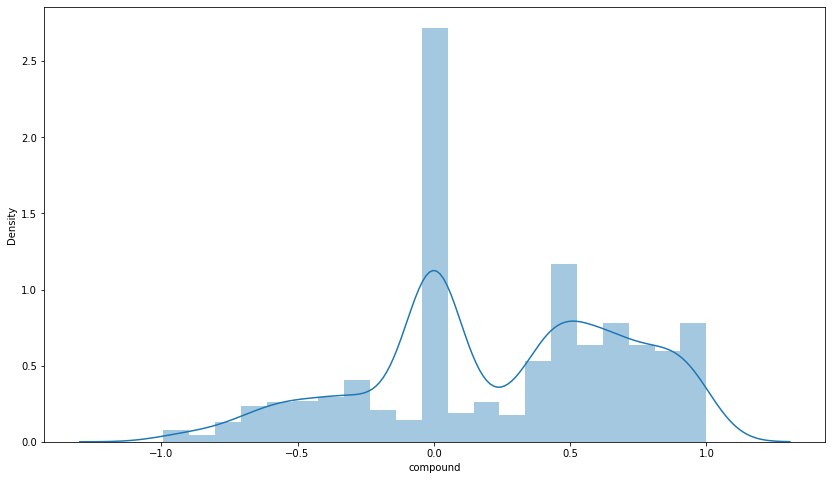

In [247]:
plt.figure(figsize=(14,8))
sns.distplot(data['compound'])

In [248]:
data['word_count'] = data['Review'].apply(lambda x: len(str(x).split(" ")))
data.head()

Review  \
0                     The media could not be loaded.   
1  The Grey mirror finish is really cool and the ...   
2  Charging speed is very fast but i couldn't tes...   
3  As an estimate it'll take 30-45 mins for a ful...   
4  Cameras are all good and in par with RM9pro+(I...   

                                              scores  compound sentiment  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral   
1  {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...    0.4201  Positive   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral   
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral   
4  {'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp...    0.4404  Positive   

   word_count  
0           6  
1          17  
2          12  
3          15  
4          16

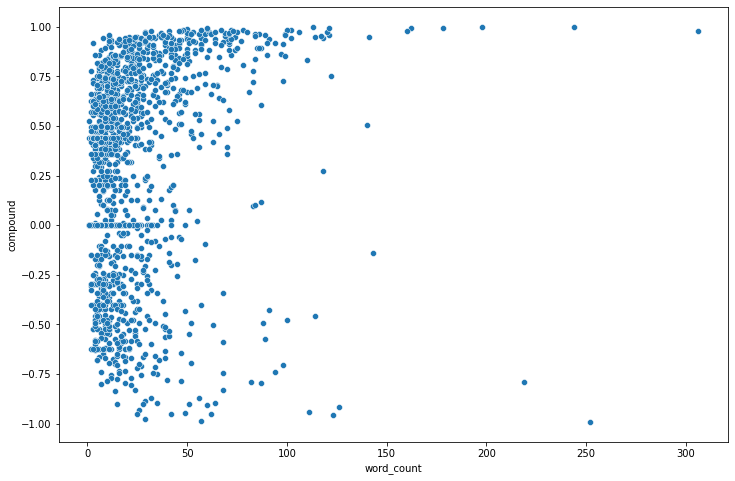

In [249]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='word_count',y='compound',data=data)

In [250]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Pie(labels=type_, values=data['sentiment'].value_counts(), name="sentiment"))
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()